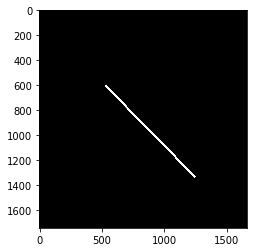

[((888.729248046875, 968.6893310546875), (22.149795532226562, 1031.72314453125), -44.44833755493164)]


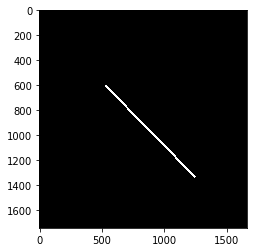

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
#画像の読み込み
img = cv2.imread('./data/9712/test.png')

#画像をグレースケール化して表示
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)
plt.gray()
plt.show()

# 2値化する。
ret, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
plt.imshow(binary)
# 膨張処理
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
binary = cv2.dilate(binary, kernel)

# 輪郭抽出する。
contours, hierarchy = cv2.findContours(
    binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
)

rects = []
for cnt in contours:
    if cv2.contourArea(cnt) < 100:
        continue  # 小さい輪郭は無視する。

    # 回転した外接矩形をとる。
    rect = cv2.minAreaRect(cnt)
    rects.append(rect)

print(rects)
def crop_rect(img, rect):
    center, size, angle = rect
    center = tuple(map(int, center))  # float -> int
    size = tuple(map(int, size))  # float -> int
    height, width = img.shape[:2]  # 画像の高さ、幅

    # 画像を回転する。
    M = cv2.getRotationMatrix2D(center, -angle, 1)
    rotated = cv2.warpAffine(img, M, (width, height))

    # 切り抜く。
    # cropped = cv2.getRectSubPix(rotated, size, center)

    return rotated


# 保存するディレクトリを作成する。
output_dir = Path("output")
output_dir.mkdir(exist_ok=True)


for i, rect in enumerate(rects):
    # 切り抜く。
    cropped = crop_rect(img, rect)
    # 保存する。
    save_path = output_dir / f"contour{i}.png"
    cv2.imwrite(str(save_path), cropped)